<a href="https://colab.research.google.com/github/bibhs0401/ClientBehaviourPredictionBanking/blob/main/Client_Behaviour_Prediction_in_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/ml/citation_policy.html.

"This dataset is public available for research. The details are described in [Moro et al., 2014]. Please include this citation if you plan to use this database: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014"

This notebook contains the following:


*  
*   List item



In [1]:
#downloading data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2023-09-26 08:45:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip.1’

bank-additional.zip     [ <=>                ] 434.15K  --.-KB/s    in 0.1s    

2023-09-26 08:45:38 (3.14 MB/s) - ‘bank-additional.zip.1’ saved [444572]



In [2]:
!unzip -o -q bank-additional.zip

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# warnings deactivate
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
#specifying the value of precision parameter
#6 is the default
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')

In [7]:
df.shape #output is row,column

(41188, 21)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


**attribute information**

Input features (column names):

1.   age - client age in years (numeric)
2. job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
3. marital - marital status (categorical: divorced, married, single, unknown)
4. education - client education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
5. default - has credit in default? (categorical: no, yes, unknown)
6. housing - has housing loan? (categorical: no, yes, unknown)
7. loan - has personal loan? (categorical: no, yes, unknown)
8. contact - contact communication type (categorical: cellular, telephone)
9. month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
10. day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
11. duration - last contact duration, in seconds (numeric).
12. campaign - number of contacts performed for this client during this campaign (numeric, includes last contact)
13. pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. previous - number of contacts performed for this client before this campaign (numeric)
15. poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
16. emp.var.rate - employment variation rate, quarterly indicator (numeric)
17. cons.price.idx - consumer price index, monthly indicator (numeric)
18. cons.conf.idx - consumer confidence index, monthly indicator (numeric)
19. euribor3m - euribor 3 month rate, daily indicator (numeric)
20. nr.employed - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. y - has the client subscribed a term deposit? (binary: yes,no)








create a classification model to predict if the client subscribe a term deposit or not?

**Data transformation**


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# Transform columns of "object" type to categorical data
col_cat = list(df.select_dtypes(include=['object']).columns)
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
df.loc[:, col_cat] = df[col_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [12]:
df['marital'].unique()

['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']

In [13]:
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

categorical data cannot be used for classification, so it has to be transformed into int or float.
LabelEncoder and OrdinalEncoder can be used for this.

In [14]:
# separating dataset into input and target(output) datasets
X = df.iloc[:,:-1]  #input columns
y = df.iloc[:,-1]    #target column

**Encoding**


*   ML algorithms require input data to be in numerical format. So, the categorical data which includes non-numeric values needs to be encoded into numerical values for the algorithms to run on them.
* Useful in feature engineering: to transform or create new features from existing ones.



In [15]:
col_cat.pop() #remove the last element from the list

'y'

In [16]:
oe = OrdinalEncoder() #transform categorical features into integer values
oe.fit(X[col_cat]) #learns the mapping between categories and integer codes based on the data in the columns
X_cat_enc = oe.transform(X[col_cat]) #transforms categorical data into integer codes
X_cat_enc

array([[3., 1., 0., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       ...,
       [5., 1., 6., ..., 7., 0., 1.],
       [9., 1., 5., ..., 7., 0., 1.],
       [5., 1., 5., ..., 7., 0., 0.]])

In [17]:
X_cat_enc = pd.DataFrame(X_cat_enc) #converts numpy array to pandas dataframe
X_cat_enc.columns = col_cat #set the column name to match the original categorical columns in col_cat
X_cat_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00


Numerical methods can consist of negatives, and have different scale.
To avoid mistakes and exceptions, these features have to be normalized.

In [18]:
# Normalization
col_num = list(df.select_dtypes(include =['int64', 'float64']).columns) #names of the columns
scaler = MinMaxScaler(feature_range=(0, 1)) #data falls in the range of [0,1]
X_num_enc = scaler.fit_transform(X[col_num]) #scale and transform the data to be in the range[0,1]


In [19]:
X_num_enc

array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

In [20]:
X_num_enc = pd.DataFrame(X_num_enc) # converts numpy to dataframe
X_num_enc.columns = col_num #set the column name of X to match the original numeric column
X_num_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...
41183,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


In [21]:
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1) #combine the categorical and numeric features into one dataframe
x_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


In [22]:
# Encoding target
le = LabelEncoder()
le.fit(y) #learn mapping between the unique categories in 'y' and numeric variables
y_enc = le.transform(y) #results in numpy array of encoded labels for categories in y
y_enc = pd.Series(y_enc) #conversion of numpy to pandas
y_enc.columns = y.name #encoded column name = original column name


In [24]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

In [26]:
y_enc.head() #0 for 'no', 1 for 'yes'

0    0
1    0
2    0
3    0
4    0
dtype: int64

There are 20 features in the dataset.
Some of them are more significant than the other for classification.

There are two popular feature selection techniques that can be used for categorical input data and categorical target variable:


1.   Chi-squared Statistic
2.   Mutual Information Statistic

Feature Importance and coorelation matrix with Heatmap can also be used for feature selection



**Chi-Squared Statistic**

The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

chi2() can be used for this.

This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class, and then transform the train and test sets.

In [27]:
#extract top 10 best features using SelectKBest
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [28]:
#concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs  Score
18     euribor3m 890.69
6           loan 547.96
15  emp.var.rate 541.30
19   nr.employed 502.66
14      poutcome 441.45
11      campaign 358.02
3      education 321.92
2        marital 167.61
13      previous 157.98
9    day_of_week  98.23


**Mutual Information Statistic**
Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In [30]:
bestfeatures = SelectKBest(score_func = mutual_info_classif, k=10 )
fit = bestfeatures.fit(x_enc, y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [31]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs  Score
18       euribor3m   0.08
11        campaign   0.08
16  cons.price.idx   0.07
17   cons.conf.idx   0.07
19     nr.employed   0.06
15    emp.var.rate   0.06
13        previous   0.04
9      day_of_week   0.04
7          contact   0.03
14        poutcome   0.02


The two functions select different significant features.

**Feature Importance**

Feature importance property of classification models can be used for getting the feature importance.

Extra Tree Classifier's inbuilt feature_importances is used for extracting top 10 features.

In [33]:
model = ExtraTreesClassifier()
model.fit(x_enc,y_enc)

ExtraTreesClassifier()

In [34]:
print(model.feature_importances_)

[0.05752035 0.03485285 0.05324498 0.01071718 0.02668262 0.01983374
 0.01294971 0.01472405 0.04952287 0.03627528 0.08771669 0.265454
 0.05881574 0.04415201 0.01296592 0.02662725 0.01901271 0.02529615
 0.09710603 0.04652987]


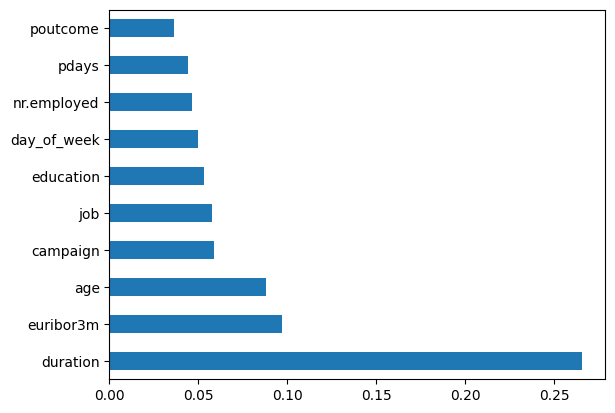

In [35]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

It can be seen that there are no exact rules for feature selection. Their importance is dependent on the model.

**Coorelation Matrix with Heatmap**

Coorelation can be positive or negative. Heatmap makes it easy to visualize this.

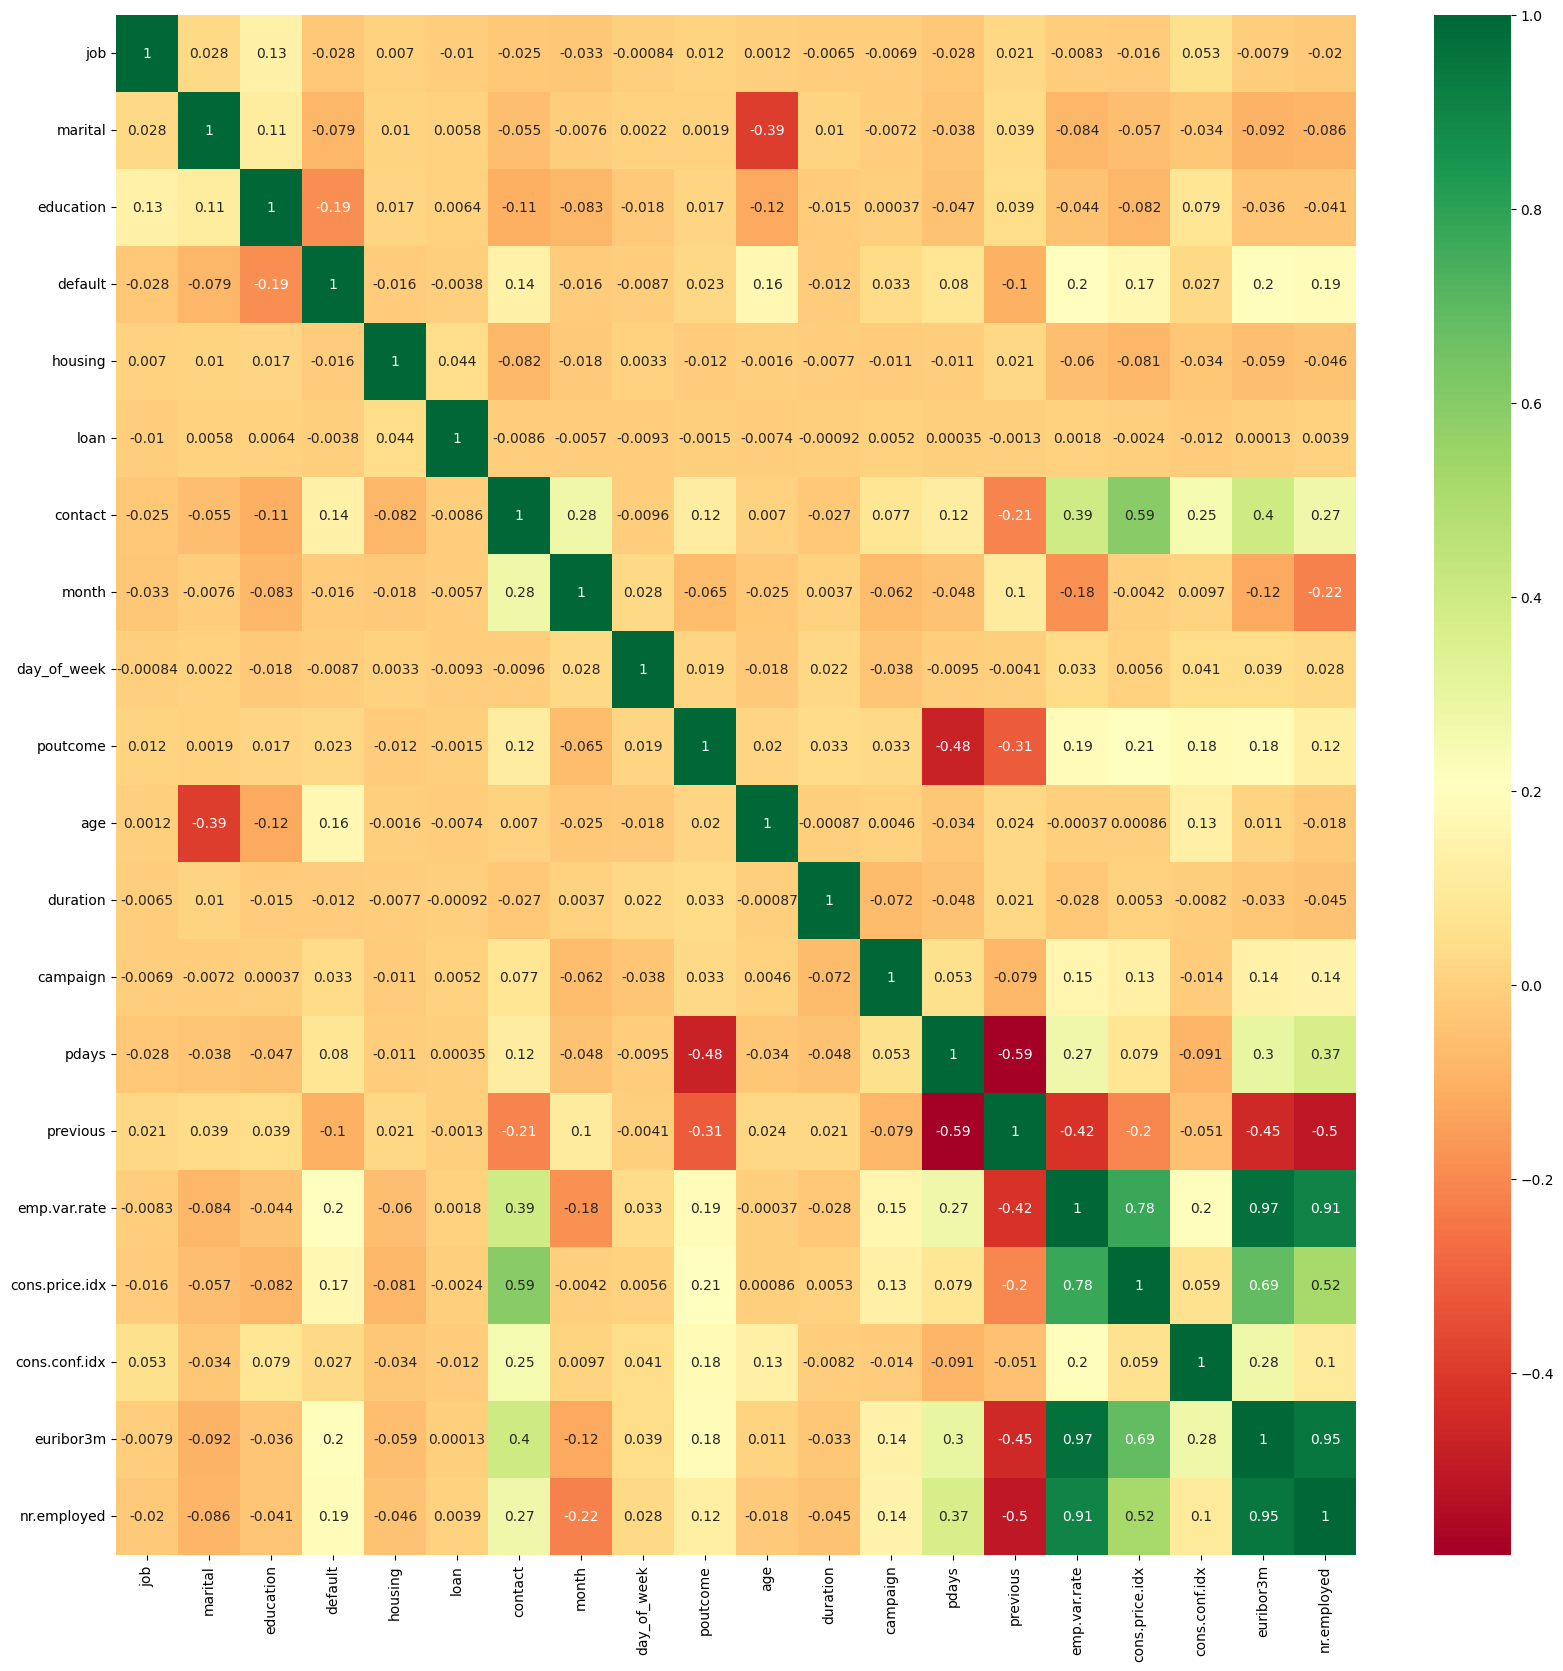

In [36]:
corrmatrix = x_enc.corr()
top_corr_features = corrmatrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

'euribor3m', 'emp.var.rate', 'nr.employed' strictly correlate each other. So, two of them are removed from the calculation.

In [37]:
# Remove correlated fields
col = list(x_enc.columns)
col.remove('emp.var.rate')
col.remove('nr.employed')
x_enc = x_enc[col]

In [39]:
x_enc.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.48,0.05,0.00,1.00,0.00,0.70,0.60,0.96
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00,0.49,0.03,0.00,1.00,0.00,0.70,0.60,0.96
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00,0.25,0.05,0.00,1.00,0.00,0.70,0.60,0.96
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.28,0.03,0.00,1.00,0.00,0.70,0.60,0.96
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00,0.48,0.06,0.00,1.00,0.00,0.70,0.60,0.96


**Classification models**

Two approaches can be used to determine the accuracy of the model



1.   Train, test split of dataset
2.   evaluating a score by cross-validation





**Creation of Train and Test Dataset**

separate train/test into 0.3 proportion, i.e, 70% of data for training and 30% for testing.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.3, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (28831, 18)
X_test: (12357, 18)
y_train: (28831,)
y_test: (12357,)
